In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 


from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sns

%matplotlib inline

In [2]:

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
#print first rows
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
print (df.shape)

(3333, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [5]:
df.describe(include=['O'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,375-1746,no,no
freq,106,1,3010,2411


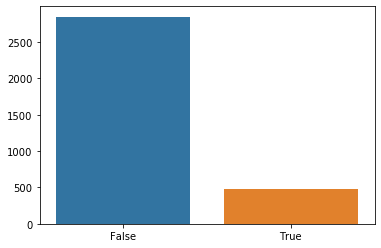

In [6]:
y = df["churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [7]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


In [8]:
y_True = df["churn"][df["churn"] != True]
print ("Non-Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Non-Churn Percentage = 85.5085508550855


In [9]:
label_encoder = preprocessing.LabelEncoder()

df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

# too specific
df.drop(["phone number"], axis = 1, inplace=True)

In [10]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

num of pepole who stay: 2850
num of pepole who churn: 483


In [11]:
# State is string and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

#print (df['Voice mail plan'][:4])
print (df.dtypes)

state                       int64
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object


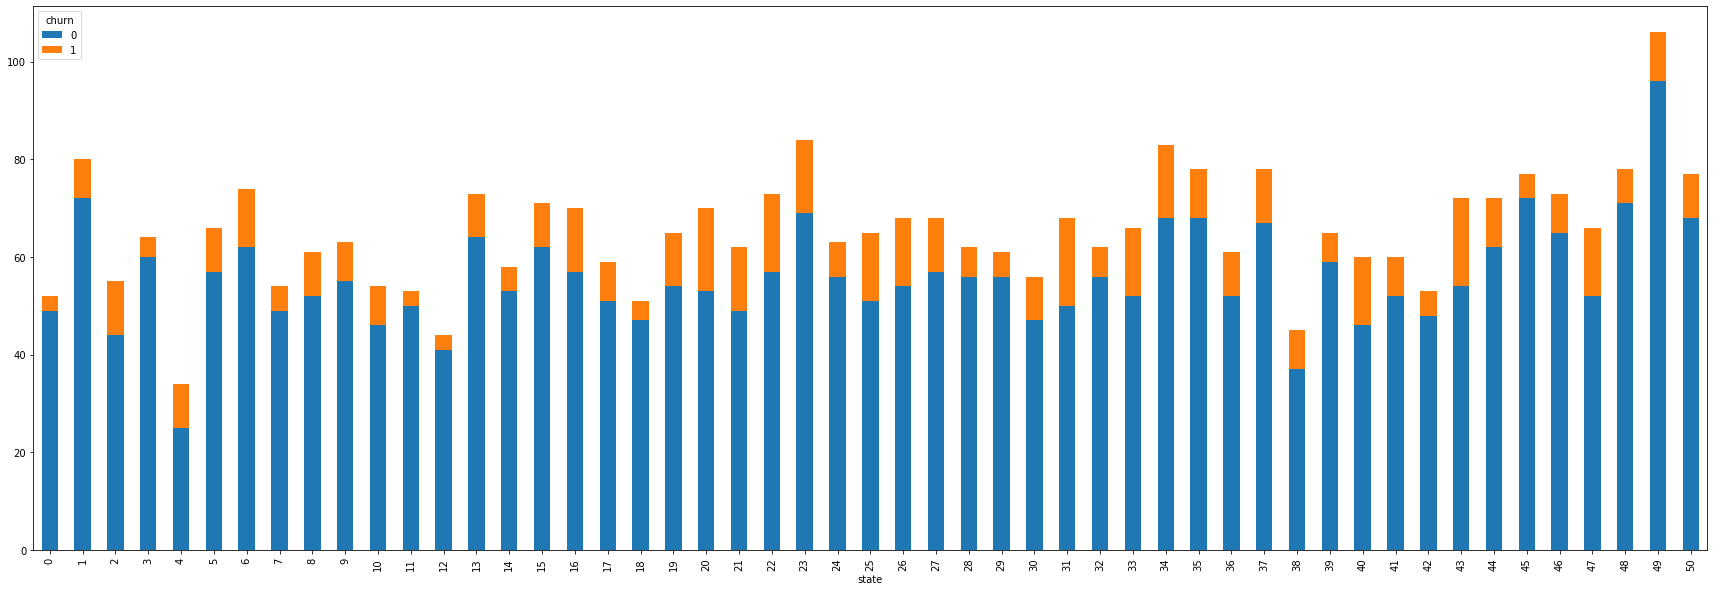

In [12]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

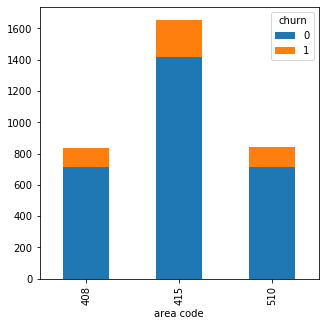

In [13]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

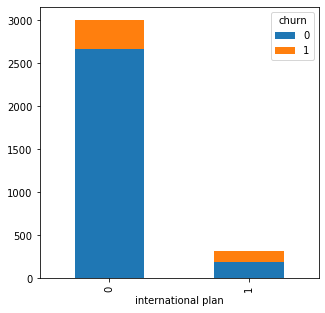

In [14]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

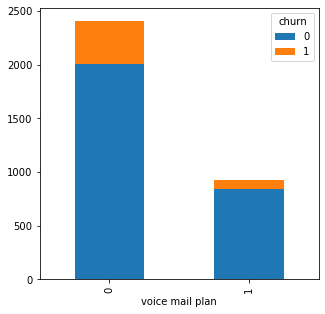

In [15]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [16]:
#we will normalize our data so the prediction on all features will be at the same scale
X = df.iloc[:,0:19].values
y = df.iloc[:,19].values
#nurmalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:19])
# # add non-feature target column to dataframe
dfNorm['churn'] = df['churn']
dfNorm.head(10)

X = dfNorm.iloc[:,0:19].values
y = dfNorm.iloc[:,19].values

In [17]:
# after we learn and preprocessed our data, we need to split it in to train and test.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape


((2333, 19), (2333,), (1000, 19), (1000,))

In [18]:
results_test = {}
results_train = {}
def prdict_date(algo_name,X_train,y_train,X_test,y_test,verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    results_test[str(algo_name)[0:str(algo_name).find('(')]] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]] = acc_train
    if verbose ==0:
        print("acc train: " + str(acc_train))
        print("acc test: "+ str(acc_val))
    else:
        return Y_pred

In [19]:
### helping function

def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

c:\users\naveen\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
c:\users\naveen\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\naveen\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in ve

In [21]:
#data labels before SMOTE:
import collections
collections.Counter(y_train)

Counter({0: 1988, 1: 345})

In [22]:
#after SMOTE:
import collections
collections.Counter(y_train_res)

Counter({0: 1988, 1: 1988})

# Predictions:

    we will try the relevant sklearn function and compere there prediction with confusion matrix

## Random Forest Classifier

acc train: 100.0
acc test: 93.5
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       862
           1       0.74      0.80      0.77       138

    accuracy                           0.94      1000
   macro avg       0.86      0.88      0.87      1000
weighted avg       0.94      0.94      0.94      1000



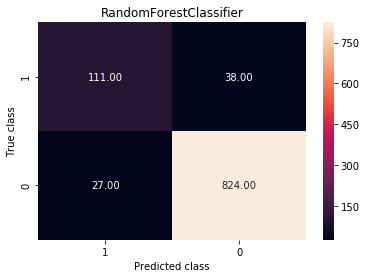

In [23]:
random_forest = RandomForestClassifier(n_estimators=75 , random_state=0  )
prdict_date(random_forest,X_train_res,y_train_res,X_test,y_test)
print(classification_report(y_test, random_forest.predict(X_test)))
conf(random_forest,X_test, y_test)

##  SVM

#### Linear SVM:


In [24]:
svm = SVC(kernel='linear', probability=True)
prdict_date(svm,X_train_res,y_train_res,X_test,y_test)

acc train: 78.52
acc test: 75.0


#### Linear rbf:


In [25]:
svm = SVC(kernel='rbf', probability=True)
prdict_date(svm,X_train_res,y_train_res,X_test,y_test)

acc train: 94.11
acc test: 89.4


####  Poly svm :


In [26]:
#  SVM
svm = SVC(kernel='poly', probability=True)
prdict_date(svm,X_train_res,y_train_res,X_test,y_test)

acc train: 92.58
acc test: 89.6


## Train : SVM


acc train: 92.58
acc test: 89.6
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       862
           1       0.60      0.73      0.66       138

    accuracy                           0.90      1000
   macro avg       0.78      0.83      0.80      1000
weighted avg       0.91      0.90      0.90      1000



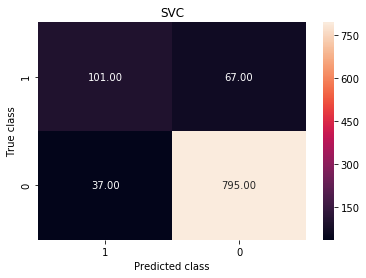

In [27]:
svm = SVC(kernel='poly', probability=True)
prdict_date(svm,X_train_res,y_train_res,X_test,y_test)

print(classification_report(y_test, svm.predict(X_test)))
conf(svm,X_test, y_test)

# Train: Logistic Regression


acc train: 85.77
acc test: 86.6
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       862
           1       0.54      0.18      0.27       138

    accuracy                           0.87      1000
   macro avg       0.71      0.58      0.60      1000
weighted avg       0.83      0.87      0.84      1000



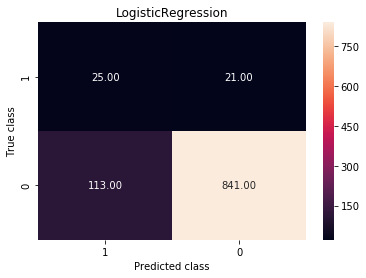

In [28]:
logr = LogisticRegression()
prdict_date(logr,X_train,y_train,X_test,y_test)

print(classification_report(y_test, logr.predict(X_test)))
conf(logr,X_test, y_test)

## Table of Algorithms with Train & Test Accuracy

In [29]:
df_test =pd.DataFrame(list(results_test.items()),
                      columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)

,algo_name,acc_test,acc_train
0,RandomForestClassifier,93.5,100.00
1,SVC,89.6,92.58
2,LogisticRegression,86.6,85.77


## Best Algorithm 

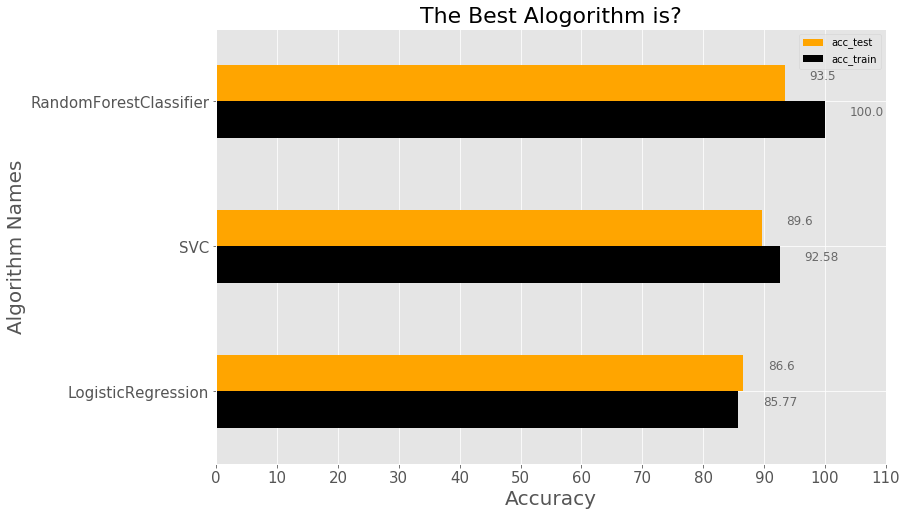

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# set jupyter's max row display
pd.set_option('display.max_row', 100)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

# Load the dataset
ax = df_results[['acc_test', 'acc_train']].plot(kind='barh',figsize=(12,8), color=['Orange', 'Black'], fontsize=15);
ax.set_alpha(0.8)
ax.set_title("The Best Alogorithm is?",fontsize=22)
ax.set_xlabel("Accuracy", fontsize=20)
ax.set_ylabel("Algorithm Names", fontsize=20)
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(df_results.iloc[:,0].values.tolist())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+4, i.get_y()+.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()